<a href="https://colab.research.google.com/github/hassanme/FUTURE_ML_01/blob/main/Machine_Learning_knn_Classification_on_Minist_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Here All the Libraries are Here**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


# **Here we Fetch the Dataset**

In [3]:
from sklearn.datasets import fetch_openml

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target


In [4]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np

# Load MNIST dataset using fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

# Reshape the data to match the expected format (num_samples, 28, 28)
X = X.reshape(X.shape[0],-1) #, 28, 28)

In [8]:
mnist # Now here this mnist dataset is in the images not in the pandas dataFrame, So here first of all we convert it into the pandas dataframe

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47

# **Here we convert the datset into the pandas dataframe to easier viewing**

In [5]:
# Convert the data to a Pandas DataFrame for easier viewing
mnist_df = pd.DataFrame(data=X, columns=mnist.feature_names)
mnist_df['target'] = y


# **Here is the basic information about on mnist dataset**

In [6]:
# Now you can use .head()
mnist_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [7]:
mnist_df.shape

(70000, 785)

In [8]:
mnist_df.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0,4.452429
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0,2.890195
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0,9.000000


In [9]:
mnist_df.tail()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
69999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [10]:
mnist_df.info

<bound method DataFrame.info of        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995       0       0       0       0       0       0       0       0       0   
69996       0       0       0       0       0       0       0       0       0   
69997       0       0       0       0       0       0       0       0       0   
69998       0       0       0       0       0       0       0       0       0   
69999       0       0       0       0       0       0       0       0       0   

       pixel10  ...  pixel776  pixel777  pixel778  pixel779  pixel780  \
0            0  ...         0         0         0         0         0   
1            0  ...         0         0         0         0         0   
2            0  ...         0         0         0         0         0   
3            0  ...         0         0         0         0         0   
4            0  ...         0         0         0         0         0   
...        ...  ...       ...       ...       ...       ...       ...   
69995        0  ...         0         0         0         0         0   
69996        0  ...         0         0         0         0         0   
69997        0  ...         0         0         0         0         0   
69998        0  ...         0         0         0         0         0   
69999        0  ...         0         0         0         0         0   

       pixel781  pixel782  pixel783  pixel784  target  
0             0         0         0         0       5  
1             0         0         0         0       0  
2             0         0         0         0       4  
3             0         0         0         0       1  
4             0         0         0         0       9  
...         ...       ...       ...       ...     ...  
69995         0         0         0         0       2  
69996         0         0         0         0       3  
69997         0         0         0         0       4  
69998         0         0         0         0       5  
69999         0         0         0         0       6  

[70000 rows x 785 columns]>

In [11]:
mnist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to target
dtypes: int64(785)
memory usage: 419.2 MB


In [12]:
mnist_df.isnull().sum()

,0
pixel1,0
pixel2,0
pixel3,0
pixel4,0
pixel5,0
...,...
pixel781,0
pixel782,0
pixel783,0
pixel784,0


In [13]:
mnist_df.isnull().sum().sum()

0

# **Now Toward here is the working of the KNN(K-Nearest-Neighbour) Model with three Distance**

# **Here is the KNN Model Using Three Distances**

# **The Euclidean Distance**


Evaluating KNN with Cross-Validation:

Using Euclidean Distance:
K=1 | CV Accuracy: 0.9733
K=2 | CV Accuracy: 0.9677
K=3 | CV Accuracy: 0.9736
K=4 | CV Accuracy: 0.9719
K=5 | CV Accuracy: 0.9722
K=6 | CV Accuracy: 0.9716
K=7 | CV Accuracy: 0.9715
K=8 | CV Accuracy: 0.9706
K=9 | CV Accuracy: 0.9705
K=10 | CV Accuracy: 0.9696

Best K for Euclidean Distance: K=3 with Accuracy=0.9736
Confusion Matrix for Euclidean Distance (K=3):
[[6858    5    6    1    1    7   18    3    1    3]
 [   1 7841    9    0    5    1    4   12    1    3]
 [  38   51 6775   19    7    3    6   76   11    4]
 [   5   16   42 6916    0   72    2   38   31   19]
 [   7   50    3    1 6619    0   13   13    2  116]
 [  27   10    4   73    8 6089   61    4   14   23]
 [  29   18    0    0    6   17 6803    0    3    0]
 [   4   68   20    2   17    0    0 7120    2   60]
 [  28   71   33   86   34   70   23   12 6417   51]
 [  18   16    7   41   68   11    3   70   10 6714]]


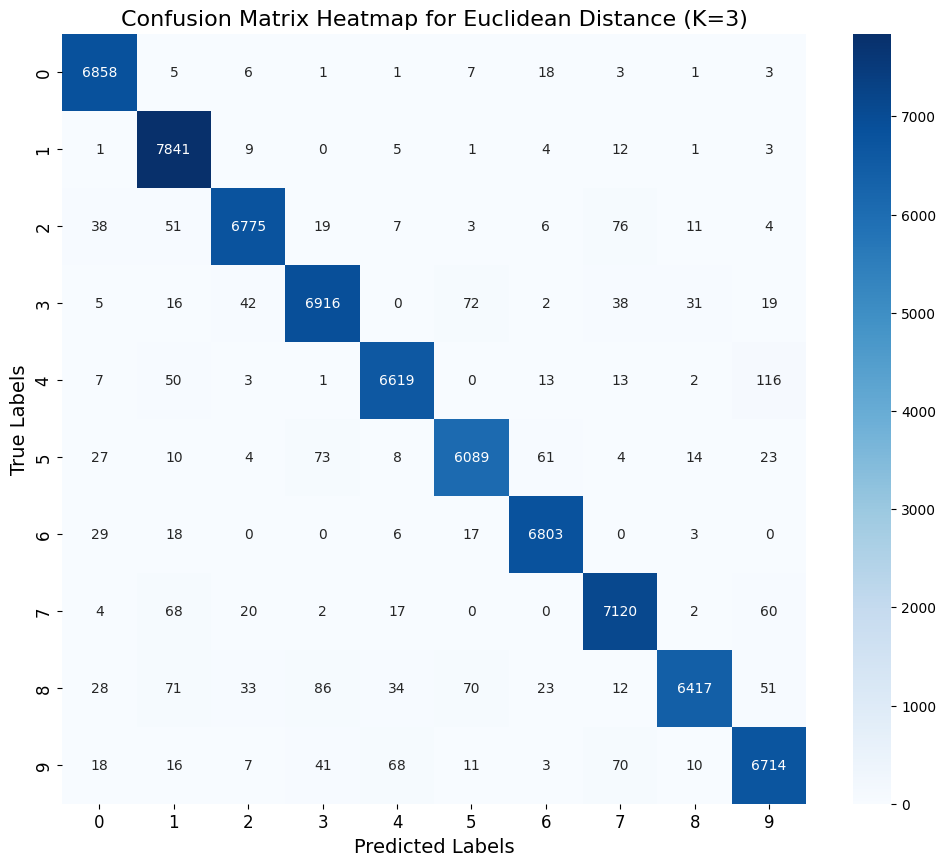


Classification Report:

              precision    recall  f1-score   support

           0     0.9776    0.9935    0.9855      6903
           1     0.9626    0.9954    0.9787      7877
           2     0.9820    0.9692    0.9756      6990
           3     0.9688    0.9685    0.9686      7141
           4     0.9784    0.9700    0.9742      6824
           5     0.9711    0.9645    0.9678      6313
           6     0.9812    0.9894    0.9853      6876
           7     0.9690    0.9763    0.9726      7293
           8     0.9884    0.9402    0.9637      6825
           9     0.9601    0.9649    0.9625      6958

    accuracy                         0.9736     70000
   macro avg     0.9739    0.9732    0.9735     70000
weighted avg     0.9737    0.9736    0.9736     70000


Per-Class Metrics:

   Class  Precision    Recall  F1-Score
0      0   0.977619  0.993481  0.985486
1      1   0.962558  0.995430  0.978718
2      2   0.982026  0.969242  0.975592
3      3   0.968763  0.968492  0.96

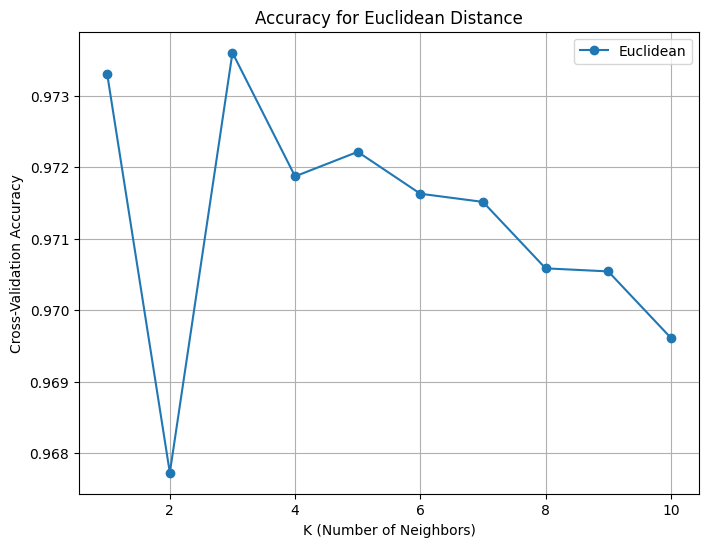

In [3]:
import seaborn as sns  # Import for heatmap visualization
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, precision_score,
    recall_score, f1_score, accuracy_score
)

# Load MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Define parameters
k_values = range(1, 11)
distance_metrics = ['euclidean']
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Store results
results = {metric: {'accuracy': []} for metric in distance_metrics}

print("\nEvaluating KNN with Cross-Validation:\n")

# Evaluation loop
for metric in distance_metrics:
    print(f"Using {metric.capitalize()} Distance:")
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        y_pred = cross_val_predict(knn, X, y, cv=cv)

        # Compute accuracy
        accuracy = accuracy_score(y, y_pred)
        results[metric]['accuracy'].append(accuracy)
        print(f"K={k} | CV Accuracy: {accuracy:.4f}")

    # Identify best K value
    best_k = k_values[np.argmax(results[metric]['accuracy'])]
    best_accuracy = max(results[metric]['accuracy'])
    print(f"\nBest K for {metric.capitalize()} Distance: K={best_k} with Accuracy={best_accuracy:.4f}")

    # Confusion matrix for the best K
    knn_best = KNeighborsClassifier(n_neighbors=best_k, metric=metric)
    y_pred_best = cross_val_predict(knn_best, X, y, cv=cv)
    cm = confusion_matrix(y, y_pred_best)

    # Print confusion matrix
    print(f"Confusion Matrix for {metric.capitalize()} Distance (K={best_k}):\n{cm}")

    # Plot confusion matrix as heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True, xticklabels=range(10), yticklabels=range(10))
    plt.title(f"Confusion Matrix Heatmap for {metric.capitalize()} Distance (K={best_k})", fontsize=16)
    plt.xlabel("Predicted Labels", fontsize=14)
    plt.ylabel("True Labels", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    # Classification Report
    class_report = classification_report(y, y_pred_best, digits=4)
    print("\nClassification Report:\n")
    print(class_report)

    # Calculate and display metrics
    precision = precision_score(y, y_pred_best, average=None)
    recall = recall_score(y, y_pred_best, average=None)
    f1 = f1_score(y, y_pred_best, average=None)
    accuracy = accuracy_score(y, y_pred_best)

    # Per-class metrics as DataFrame
    metrics_df = pd.DataFrame({
        'Class': range(10),  # Assuming 10 classes (0-9) for MNIST
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

    print("\nPer-Class Metrics:\n")
    print(metrics_df)

    # Overall Metrics
    print("\nOverall Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Macro Precision: {precision_score(y, y_pred_best, average='macro'):.4f}")
    print(f"Macro Recall: {recall_score(y, y_pred_best, average='macro'):.4f}")
    print(f"Macro F1-Score: {f1_score(y, y_pred_best, average='macro'):.4f}")

    # Plot accuracy vs. K values
    plt.figure(figsize=(8, 6))
    plt.plot(k_values, results[metric]['accuracy'], marker='o', label=f'{metric.capitalize()}')
    plt.title(f'Accuracy for {metric.capitalize()} Distance')
    plt.xlabel('K (Number of Neighbors)')
    plt.ylabel('Cross-Validation Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()


# **The Manhattan Distance**


Evaluating KNN with Cross-Validation:

Using Manhattan Distance:
K=1 | CV Accuracy: 0.9674
K=2 | CV Accuracy: 0.9592
K=3 | CV Accuracy: 0.9676
K=4 | CV Accuracy: 0.9654
K=5 | CV Accuracy: 0.9663
K=6 | CV Accuracy: 0.9649
K=7 | CV Accuracy: 0.9651
K=8 | CV Accuracy: 0.9639
K=9 | CV Accuracy: 0.9641
K=10 | CV Accuracy: 0.9630

Best K for Manhattan Distance: K=3 with Accuracy=0.9676
Confusion Matrix for Manhattan Distance (K=3):
[[6850    7    6    1    1    7   22    5    1    3]
 [   1 7845    9    2    5    0    1   11    1    2]
 [  42   77 6712   20    8    5   13   98   11    4]
 [   8   19   49 6883    1   76    3   46   36   20]
 [   6   75    3    1 6582    0   13   16    2  126]
 [  27   18    4   81   12 6068   64    5    9   25]
 [  36   18    0    0    8   18 6794    0    2    0]
 [   4   90   18    2   21    0    0 7100    1   57]
 [  39  109   42  127   45   98   29   28 6243   65]
 [  20   28    8   51   74    9    3  101   10 6654]]


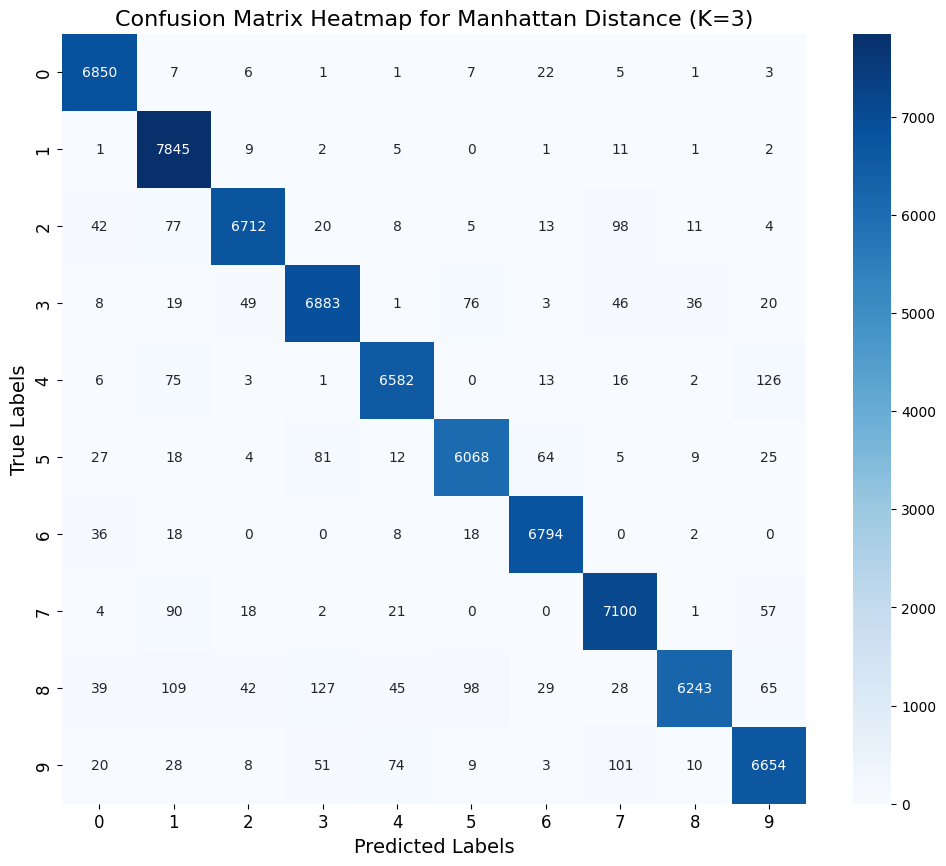


Classification Report:

              precision    recall  f1-score   support

           0     0.9740    0.9923    0.9831      6903
           1     0.9468    0.9959    0.9707      7877
           2     0.9797    0.9602    0.9699      6990
           3     0.9602    0.9639    0.9621      7141
           4     0.9741    0.9645    0.9693      6824
           5     0.9661    0.9612    0.9636      6313
           6     0.9787    0.9881    0.9834      6876
           7     0.9582    0.9735    0.9658      7293
           8     0.9884    0.9147    0.9502      6825
           9     0.9566    0.9563    0.9564      6958

    accuracy                         0.9676     70000
   macro avg     0.9683    0.9671    0.9674     70000
weighted avg     0.9679    0.9676    0.9675     70000


Per-Class Metrics:

   Class  Precision    Recall  F1-Score
0      0   0.973980  0.992322  0.983065
1      1   0.946778  0.995938  0.970736
2      2   0.979711  0.960229  0.969872
3      3   0.960240  0.963871  0.96

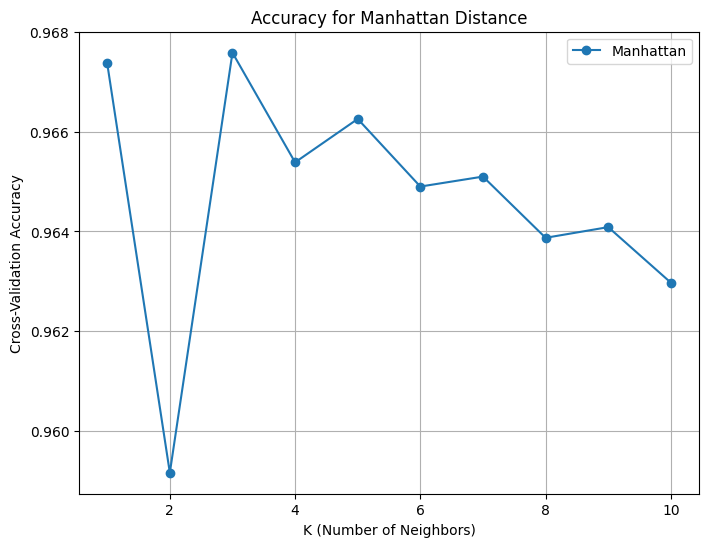

In [4]:
import seaborn as sns  # Import for heatmap visualization
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, precision_score,
    recall_score, f1_score, accuracy_score
)

# Load MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Define parameters
k_values = range(1, 11)
distance_metrics = ['manhattan']
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Store results
results = {metric: {'accuracy': []} for metric in distance_metrics}

print("\nEvaluating KNN with Cross-Validation:\n")

# Evaluation loop
for metric in distance_metrics:
    print(f"Using {metric.capitalize()} Distance:")
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        y_pred = cross_val_predict(knn, X, y, cv=cv)

        # Compute accuracy
        accuracy = accuracy_score(y, y_pred)
        results[metric]['accuracy'].append(accuracy)
        print(f"K={k} | CV Accuracy: {accuracy:.4f}")

    # Identify best K value
    best_k = k_values[np.argmax(results[metric]['accuracy'])]
    best_accuracy = max(results[metric]['accuracy'])
    print(f"\nBest K for {metric.capitalize()} Distance: K={best_k} with Accuracy={best_accuracy:.4f}")

    # Confusion matrix for the best K
    knn_best = KNeighborsClassifier(n_neighbors=best_k, metric=metric)
    y_pred_best = cross_val_predict(knn_best, X, y, cv=cv)
    cm = confusion_matrix(y, y_pred_best)

    # Print confusion matrix
    print(f"Confusion Matrix for {metric.capitalize()} Distance (K={best_k}):\n{cm}")

    # Plot confusion matrix as heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True, xticklabels=range(10), yticklabels=range(10))
    plt.title(f"Confusion Matrix Heatmap for {metric.capitalize()} Distance (K={best_k})", fontsize=16)
    plt.xlabel("Predicted Labels", fontsize=14)
    plt.ylabel("True Labels", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    # Classification Report
    class_report = classification_report(y, y_pred_best, digits=4)
    print("\nClassification Report:\n")
    print(class_report)

    # Calculate and display metrics
    precision = precision_score(y, y_pred_best, average=None)
    recall = recall_score(y, y_pred_best, average=None)
    f1 = f1_score(y, y_pred_best, average=None)
    accuracy = accuracy_score(y, y_pred_best)

    # Per-class metrics as DataFrame
    metrics_df = pd.DataFrame({
        'Class': range(10),  # Assuming 10 classes (0-9) for MNIST
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

    print("\nPer-Class Metrics:\n")
    print(metrics_df)

    # Overall Metrics
    print("\nOverall Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Macro Precision: {precision_score(y, y_pred_best, average='macro'):.4f}")
    print(f"Macro Recall: {recall_score(y, y_pred_best, average='macro'):.4f}")
    print(f"Macro F1-Score: {f1_score(y, y_pred_best, average='macro'):.4f}")

    # Plot accuracy vs. K values
    plt.figure(figsize=(8, 6))
    plt.plot(k_values, results[metric]['accuracy'], marker='o', label=f'{metric.capitalize()}')
    plt.title(f'Accuracy for {metric.capitalize()} Distance')
    plt.xlabel('K (Number of Neighbors)')
    plt.ylabel('Cross-Validation Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()


# **The Chebyshev Distance**


Evaluating KNN with Cross-Validation:

Using Chebyshev Distance:
K=1 | CV Accuracy: 0.8340
K=2 | CV Accuracy: 0.8130
K=3 | CV Accuracy: 0.8133
K=4 | CV Accuracy: 0.8173
K=5 | CV Accuracy: 0.8170
K=6 | CV Accuracy: 0.8171
K=7 | CV Accuracy: 0.8154
K=8 | CV Accuracy: 0.8123
K=9 | CV Accuracy: 0.8095
K=10 | CV Accuracy: 0.8082

Best K for Chebyshev Distance: K=1 with Accuracy=0.8340
Confusion Matrix for Chebyshev Distance (K=1):
[[6499   13   78   52   47   63   85   12   37   17]
 [  10 7710   33   22    7   10   21   15   39   10]
 [ 329  103 4980  383  137  191  289   87  417   74]
 [ 176   81  377 5294   55  296   98   64  616   84]
 [ 171   43  163   82 5439  127  101   54  294  350]
 [ 303   50  151  374  125 4307  139   40  670  154]
 [ 168   30  106   33   70   67 6271   17  102   12]
 [  87   39   94  117   86   59   12 6370  205  224]
 [ 164  104  258  329   97  206  116   38 5388  125]
 [ 112   19   81   82  147   65   13   91  225 6123]]


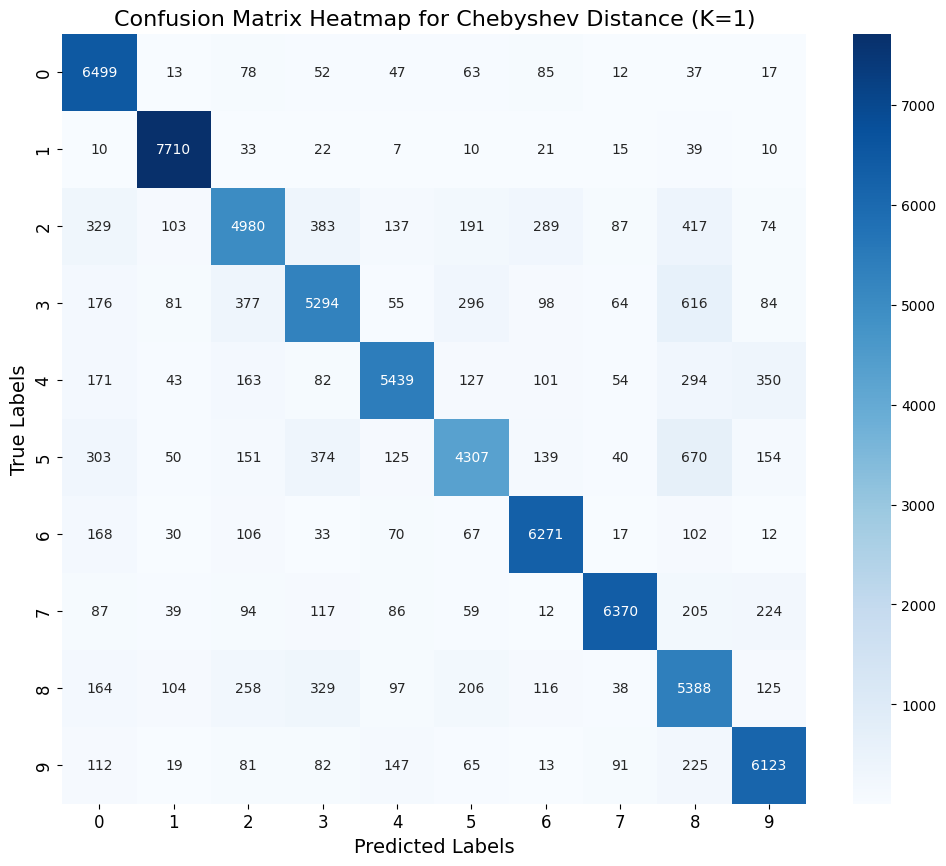


Classification Report:

              precision    recall  f1-score   support

           0     0.8105    0.9415    0.8711      6903
           1     0.9412    0.9788    0.9596      7877
           2     0.7879    0.7124    0.7483      6990
           3     0.7822    0.7414    0.7612      7141
           4     0.8758    0.7970    0.8346      6824
           5     0.7989    0.6822    0.7360      6313
           6     0.8777    0.9120    0.8945      6876
           7     0.9384    0.8734    0.9048      7293
           8     0.6741    0.7895    0.7272      6825
           9     0.8536    0.8800    0.8666      6958

    accuracy                         0.8340     70000
   macro avg     0.8340    0.8308    0.8304     70000
weighted avg     0.8363    0.8340    0.8332     70000


Per-Class Metrics:

   Class  Precision    Recall  F1-Score
0      0   0.810450  0.941475  0.871063
1      1   0.941162  0.978799  0.959612
2      2   0.787850  0.712446  0.748253
3      3   0.782210  0.741353  0.76

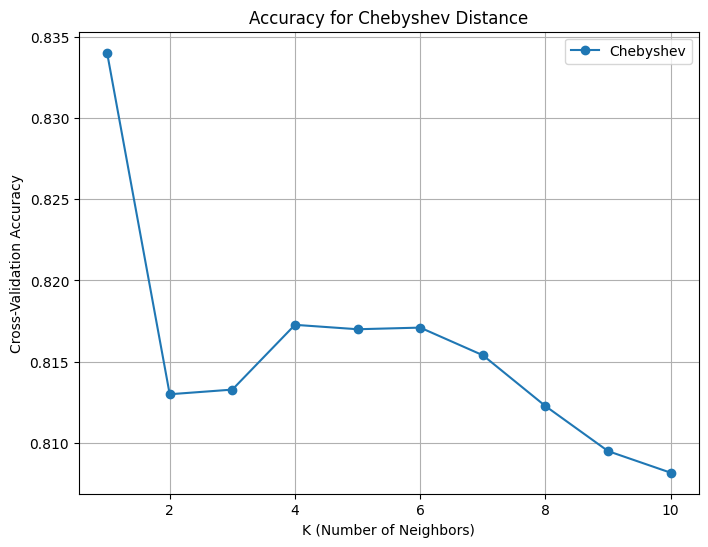

In [5]:
import seaborn as sns  # Import for heatmap visualization
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, precision_score,
    recall_score, f1_score, accuracy_score
)

# Load MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Define parameters
k_values = range(1, 11)
distance_metrics = ['chebyshev']
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Store results
results = {metric: {'accuracy': []} for metric in distance_metrics}

print("\nEvaluating KNN with Cross-Validation:\n")

# Evaluation loop
for metric in distance_metrics:
    print(f"Using {metric.capitalize()} Distance:")
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        y_pred = cross_val_predict(knn, X, y, cv=cv)

        # Compute accuracy
        accuracy = accuracy_score(y, y_pred)
        results[metric]['accuracy'].append(accuracy)
        print(f"K={k} | CV Accuracy: {accuracy:.4f}")

    # Identify best K value
    best_k = k_values[np.argmax(results[metric]['accuracy'])]
    best_accuracy = max(results[metric]['accuracy'])
    print(f"\nBest K for {metric.capitalize()} Distance: K={best_k} with Accuracy={best_accuracy:.4f}")

    # Confusion matrix for the best K
    knn_best = KNeighborsClassifier(n_neighbors=best_k, metric=metric)
    y_pred_best = cross_val_predict(knn_best, X, y, cv=cv)
    cm = confusion_matrix(y, y_pred_best)

    # Print confusion matrix
    print(f"Confusion Matrix for {metric.capitalize()} Distance (K={best_k}):\n{cm}")

    # Plot confusion matrix as heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True, xticklabels=range(10), yticklabels=range(10))
    plt.title(f"Confusion Matrix Heatmap for {metric.capitalize()} Distance (K={best_k})", fontsize=16)
    plt.xlabel("Predicted Labels", fontsize=14)
    plt.ylabel("True Labels", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    # Classification Report
    class_report = classification_report(y, y_pred_best, digits=4)
    print("\nClassification Report:\n")
    print(class_report)

    # Calculate and display metrics
    precision = precision_score(y, y_pred_best, average=None)
    recall = recall_score(y, y_pred_best, average=None)
    f1 = f1_score(y, y_pred_best, average=None)
    accuracy = accuracy_score(y, y_pred_best)

    # Per-class metrics as DataFrame
    metrics_df = pd.DataFrame({
        'Class': range(10),  # Assuming 10 classes (0-9) for MNIST
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

    print("\nPer-Class Metrics:\n")
    print(metrics_df)

    # Overall Metrics
    print("\nOverall Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Macro Precision: {precision_score(y, y_pred_best, average='macro'):.4f}")
    print(f"Macro Recall: {recall_score(y, y_pred_best, average='macro'):.4f}")
    print(f"Macro F1-Score: {f1_score(y, y_pred_best, average='macro'):.4f}")

    # Plot accuracy vs. K values
    plt.figure(figsize=(8, 6))
    plt.plot(k_values, results[metric]['accuracy'], marker='o', label=f'{metric.capitalize()}')
    plt.title(f'Accuracy for {metric.capitalize()} Distance')
    plt.xlabel('K (Number of Neighbors)')
    plt.ylabel('Cross-Validation Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Normalize features to range [0, 1]
scaler = MinMaxScaler()
X = scaler.fit_transform(mnist_df)

**[Here is the dataset teaining and testing and Flatten the dataset](https://)**

In [ ]:
# Split data into training and testing sets using scikit-learn's train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Print the shapes to confirm the split
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (56000, 784)
y_train shape: (56000,)
X_test shape: (14000, 784)
y_test shape: (14000,)


In [ ]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X_train.shape

(56000, 784)

In [ ]:
X_test.shape

(14000, 784)

In [ ]:
X_test[0] # Now here we print the first row in x_test to check the behaviour of values before flatten

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  96, 121, 121, 121, 121, 190,
       121, 190, 190, 162, 218, 121, 121, 108,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  46, 107, 219, 249, 252, 25

In [ ]:
X_train[0] # Now here we print the first row in x_test to check the behaviour of values before flatten

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        26, 255,  90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  26,  26,   0,  13,
        64, 138, 180, 199,  11,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  41, 224, 232,
       207, 221, 253, 242, 162,  17,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [ ]:
y_train

array([5, 4, 8, ..., 1, 0, 0])

In [ ]:
y_test

array([8, 4, 8, ..., 2, 7, 1])

8


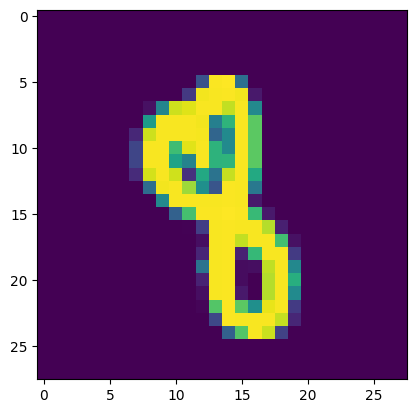

In [ ]:
plt.imshow(X_train[2].reshape(28,28))
print(y_train[2])

In [ ]:
y_test

array([8, 4, 8, ..., 2, 7, 1])

8


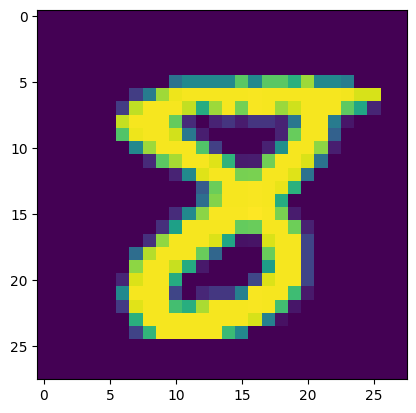

In [ ]:
plt.imshow(X_test[0].reshape(28,28))
print(y_test[0])

4


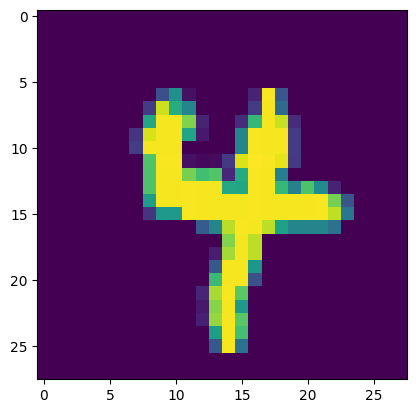

In [ ]:
plt.imshow(X_test[1].reshape(28,28))
print(y_test[1])

# **Here in this part we flatten all the values between 0 to 255 converted into the 0 to 1**

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train[0]


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
X_train[0] # Now here we print the first row in x_train to check the behaviour of values after flatten

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
X_test[0]  # Now here we print the first row in x_train to check the behaviour of values after flatten

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
y_train

array([5, 4, 8, ..., 1, 0, 0])

In [ ]:
y_test

array([8, 4, 8, ..., 2, 7, 1])

In [ ]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_test[0] # Now here we print the first row in x_test to check the behaviour of values after flatten

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# **Now Toward here is the working of the KNN(K-Nearest-Neighbour) Model with three Distances**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
def evaluate_knn(X, y, dataset_name):
    distance_metrics = ['euclidean', 'manhattan', 'chebyshev']
    results = []

    print(f"\n\nEvaluating {dataset_name} Dataset:")
    for metric in distance_metrics:
        print(f"\nUsing {metric.capitalize()} Distance:")
        for k in range(1, 11):
            # Initialize the KNN classifier
            knn = KNeighborsClassifier(n_neighbors=k, metric=metric)

            # Split data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Cross-validation
            cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
            mean_cv_accuracy = np.mean(cv_scores)

            # Fit and predict
            knn.fit(X_train, y_train)
            y_pred = knn.predict(X_test)

            # Accuracy and Confusion Matrix
            test_accuracy = accuracy_score(y_test, y_pred)
            conf_matrix = confusion_matrix(y_test, y_pred)

            # Print results
            print(f"K={k} | CV Accuracy: {mean_cv_accuracy:.4f} | Test Accuracy: {test_accuracy:.4f} | Confusion Matrix: {conf_matrix}")
            results.append({
                'Metric': metric,
                'K': k,
                'CV Accuracy': mean_cv_accuracy,
                'Test Accuracy': test_accuracy,
                'Confusion Matrix': conf_matrix
            })
    return results


In [ ]:
print("\n=== Evaluating MNIST Dataset ===")
mnist_results = evaluate_knn(X_test, y_test, "MNIST")



=== Evaluating MNIST Dataset ===


Evaluating MNIST Dataset:

Using Euclidean Distance:
K=1 | CV Accuracy: 0.9437 | Test Accuracy: 0.9564 | Confusion Matrix: [[254   0   0   0   0   0   0   0   2   0]
 [  0 330   1   1   0   0   0   0   0   0]
 [  2   7 263   0   1   0   2   3   1   1]
 [  0   2   0 288   0   5   0   1   5   0]
 [  0   4   0   0 235   0   0   1   0   6]
 [  2   2   0   8   1 239   4   0   0   0]
 [  1   1   0   0   0   3 283   0   0   0]
 [  0   1   2   0   0   0   0 270   1   3]
 [  1   3   5   3   0   6   1   3 231   3]
 [  4   1   0   1  10   0   0   6   1 285]]
K=2 | CV Accuracy: 0.9335 | Test Accuracy: 0.9386 | Confusion Matrix: [[256   0   0   0   0   0   0   0   0   0]
 [  0 331   0   1   0   0   0   0   0   0]
 [  7  11 258   0   1   0   1   2   0   0]
 [  0   2   4 290   0   3   0   1   1   0]
 [  0   5   0   0 237   0   0   1   0   3]
 [  2   3   0  15   1 232   3   0   0   0]
 [  2   1   0   0   0   3 282   0   0   0]
 [  0   3   2   1   0   0   0 268   1  

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




Evaluating MNIST Dataset:

Using Euclidean Distance:
K=1 | CV Accuracy: 0.9673 | Test Accuracy: 0.9720
K=3 | CV Accuracy: 0.9684 | Test Accuracy: 0.9713
K=5 | CV Accuracy: 0.9674 | Test Accuracy: 0.9701
K=7 | CV Accuracy: 0.9661 | Test Accuracy: 0.9687
K=9 | CV Accuracy: 0.9647 | Test Accuracy: 0.9674


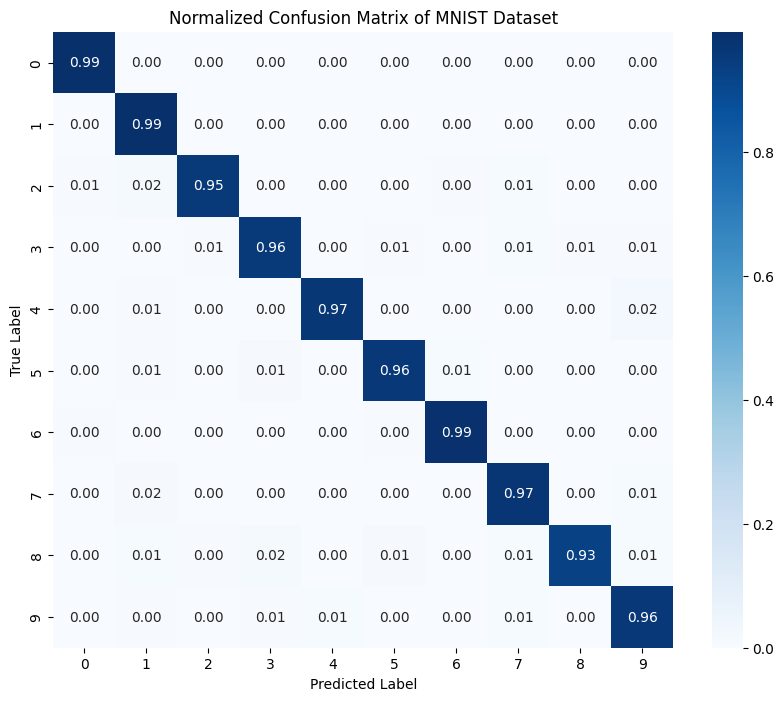

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# Function to evaluate KNN
def evaluate_knn(X, y, dataset_name):
    distance_metrics = ['euclidean']
    results = []

    print(f"\n\nEvaluating {dataset_name} Dataset:")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for metric in distance_metrics:
        print(f"\nUsing {metric.capitalize()} Distance:")
        for k in range(1, 11, 2):  # Using odd k-values for balanced results
            knn = KNeighborsClassifier(n_neighbors=k, metric=metric)

            # Fit and predict
            knn.fit(X_train, y_train)
            y_pred = knn.predict(X_test)

            # Accuracy and Confusion Matrix
            test_accuracy = accuracy_score(y_test, y_pred)
            conf_matrix = confusion_matrix(y_test, y_pred)

            # Print results
            print(f"K={k} | CV Accuracy: {mean_cv_accuracy:.4f} | Test Accuracy: {test_accuracy:.4f}")
            results.append({
                'Metric': metric,
                'K': k,
                'CV Accuracy': mean_cv_accuracy,
                'Test Accuracy': test_accuracy,
                'Confusion Matrix': conf_matrix
            })
    return results, y_test, y_pred

# Example: Evaluate MNIST dataset (assuming X and y are pre-loaded)
mnist_results, y_test, y_pred = evaluate_knn(X, y, "MNIST")

# Confusion Matrix and Heatmap
cm = confusion_matrix(y_test, y_pred)

# Normalize confusion matrix to show percentages
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", cbar=True, xticklabels=range(10), yticklabels=range(10))
plt.title("Normalized Confusion Matrix of MNIST Dataset")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [ ]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: int64(784)
memory usage: 418.7 MB


In [ ]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y.head()

,class
0,5
1,0
2,4
3,1
4,9


In [ ]:
y

,class
0,5
1,0
2,4
3,1
4,9
...,...
69995,2
69996,3
69997,4
69998,5


In [ ]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y.shape

(70000,)